# Birds-Eye View

OpenCV function or other method has been used to correctly rectify each image to a "birds-eye view"

import library

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from Project2_2 import binaryImage
from Project2_1 import distortionCorrection, undistort

<Figure size 1000x400 with 2 Axes>

In [2]:
ret, mtx, dist, rvecs, tvecs = distortionCorrection(calib_images_dir='camera_cal')

Below method will return the perspective image of undistorated image and then return the wraped image of perspective image

In [3]:
def birdeye(img):
    
    birdEye_Image = []
    """
    Apply perspective transform to input frame to get the bird's eye view.
    :param img: input color frame
    :param verbose: if True, show the transformation result
    :return: warped image, and both forward and backward transformation matrices
    """
    h, w = img.shape[:2]

    src = np.float32([[w, h - 10],  # br
                      [0, h - 10],  # bl
                      [546, 460],  # tl
                      [732, 460]])  # tr
    dst = np.float32([[w, h],  # br
                      [0, h],  # bl
                      [0, 0],  # tl
                      [w, 0]])  # tr

    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)
    birdEye_Image.append(img)
    birdEye_Image.append(warped)
    
    return warped, M, Minv, birdEye_Image

Below methoed will show birdeye transfomraiton for each image which is mention in test example

In [5]:
def showImages(images, cmap=None):
    for i in range(len(images)):
        for j in range(len(images[i])):
            f, axarray = plt.subplots(1, 2)
            f.set_facecolor('white')
            axarray[0].set_title('Before perspective transform')
            axarray[0].imshow(images[i][j], cmap='gray')
            j = j + 1
            axarray[1].set_title('After perspective transform')
            axarray[1].imshow(images[i][j], cmap='gray')
            break
        plt.show()

Below block to test all images and show into into notbook

In [6]:
image_birdey = []

    # show result on test images
for test_img in glob.glob('test_images/*.jpg'):

    img = cv2.imread(test_img)

    img_undistorted = undistort(img, mtx, dist)

    img_binary = binaryImage(img_undistorted)

    img_birdeye, M, Minv , birdEye_Image = birdeye(cv2.cvtColor(img_undistorted, cv2.COLOR_BGR2RGB))
    image_birdey.append(birdEye_Image)

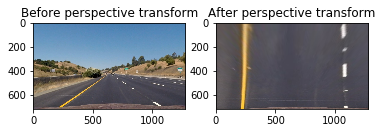

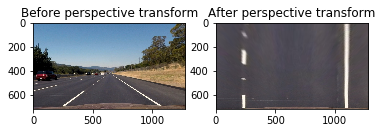

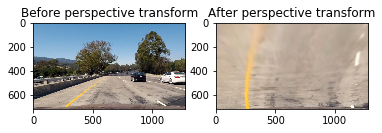

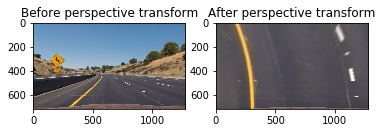

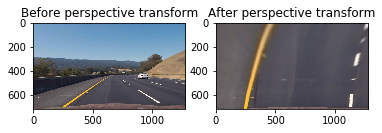

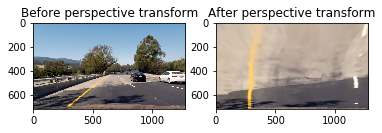

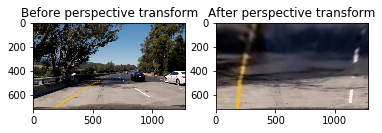

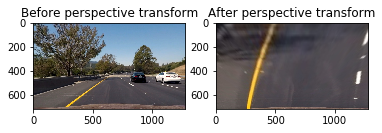

In [7]:
showImages(image_birdey)